In [1]:
import pylab as pl
import pandas as pd
import numpy as np
from numpy import ma
import os
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline
import geopandas as gpd
import pysal as ps

Populating the interactive namespace from numpy and matplotlib


In [2]:
Education2000 = pd.read_excel('Education 2000.xlsx')
Education2000.columns

Index([u'Id2', u'Total', u'Male Bachelor degree', u'Female Bachelor degree'], dtype='object')

In [3]:
Education2000.head()

,Id2,Total,Male Bachelor degree,Female Bachelor degree
0,36005000100,9228,0,0
1,36005000200,2116,44,78
2,36005000400,1922,89,67
3,36005000500,0,0,0
4,36005001100,425,14,0


In [4]:
Education2000['Totbach2000'] = Education2000['Male Bachelor degree'] + Education2000['Female Bachelor degree']

In [5]:
Education2000.head()

,Id2,Total,Male Bachelor degree,Female Bachelor degree,Totbach2000
0,36005000100,9228,0,0,0
1,36005000200,2116,44,78,122
2,36005000400,1922,89,67,156
3,36005000500,0,0,0,0
4,36005001100,425,14,0,14


In [6]:
Education2009 = pd.read_excel('Education 2009.xlsx')
Education2009.columns

Index([u'Id2', u'Total', u'Male Bachelor degree', u'Female Bachelor degree'], dtype='object')

In [7]:
Education2009.head()

,Id2,Total,Male Bachelor degree,Female Bachelor degree
0,36005000100,8043,128,36
1,36005000200,2421,80,81
2,36005000400,2983,141,286
3,36005000500,0,0,0
4,36005001100,337,0,0


In [8]:
Education2009['Totbach2009'] = Education2009['Male Bachelor degree'] + Education2009['Female Bachelor degree']

In [9]:
Education2009.head()

,Id2,Total,Male Bachelor degree,Female Bachelor degree,Totbach2009
0,36005000100,8043,128,36,164
1,36005000200,2421,80,81,161
2,36005000400,2983,141,286,427
3,36005000500,0,0,0,0
4,36005001100,337,0,0,0


In [10]:
Education2013 = pd.read_excel('Education 2013.xlsx')
Education2013.columns

Index([u'Id2', u' Total', u'Male Bachelor degree', u'Female Bachelor degree'], dtype='object')

In [11]:
Education2013['Totbach2013'] = Education2013['Male Bachelor degree'] + Education2013['Female Bachelor degree']

In [12]:
Education2013.head()

,Id2,Total,Male Bachelor degree,Female Bachelor degree,Totbach2013
0,36005000100,5939,63,24,87
1,36005000200,3076,225,180,405
2,36005000400,3587,241,358,599
3,36005001600,3385,104,179,283
4,36005001900,1559,65,114,179


In [13]:
IDtoN = pd.read_excel('GeoID to Neighborhoods.xlsx')
IDtoN.columns

Index([u'Id2', u'neighborhood'], dtype='object')

In [14]:
IDtoN.head()

,Id2,neighborhood
0,36005000100,Rikers Island
1,36005000100,Rikers Island
2,36005000200,Soundview-Castle Hill-Clason Point-Harding Park
3,36005000200,Soundview-Castle Hill-Clason Point-Harding Park
4,36005000200,Soundview-Castle Hill-Clason Point-Harding Park


In [15]:
Education2000a = pd.merge(Education2000, IDtoN, on='Id2')

In [16]:
Education2000a.head()

,Id2,Total,Male Bachelor degree,Female Bachelor degree,Totbach2000,neighborhood
0,36005000100,9228,0,0,0,Rikers Island
1,36005000100,9228,0,0,0,Rikers Island
2,36005000200,2116,44,78,122,Soundview-Castle Hill-Clason Point-Harding Park
3,36005000200,2116,44,78,122,Soundview-Castle Hill-Clason Point-Harding Park
4,36005000200,2116,44,78,122,Soundview-Castle Hill-Clason Point-Harding Park


In [17]:
Education2000b = (Education2000a.groupby(Education2000a['neighborhood']).sum())

In [18]:
Education2000b.head()

,Id2,Total,Male Bachelor degree,Female Bachelor degree,Totbach2000
neighborhood,,,,,
Airport,108243137800,30,0,0,0
Allerton-Pelham Gardens,612085552200,27164,1630,1954,3584
Annadale-Huguenot-Prince's Bay-Eltingville,360850166818,27598,2292,1936,4228
Arden Heights,433020204105,51888,4123,3550,7673
Astoria,1948374570600,163976,14640,13082,27722


In [19]:
del Education2000b['Id2']

In [20]:
del Education2000b['Male Bachelor degree']
del Education2000b['Female Bachelor degree']

In [21]:
Education2000b.head()

,Total,Totbach2000
neighborhood,,
Airport,30,0
Allerton-Pelham Gardens,27164,3584
Annadale-Huguenot-Prince's Bay-Eltingville,27598,4228
Arden Heights,51888,7673
Astoria,163976,27722


In [22]:
Education2009a = pd.merge(Education2009, IDtoN, on='Id2')

In [23]:
Education2009b = (Education2009a.groupby(Education2009a['neighborhood']).sum())

In [24]:
del Education2009b['Id2']
del Education2009b['Male Bachelor degree']
del Education2009b['Female Bachelor degree']

In [25]:

Education2009b.head()

,Total,Totbach2009
neighborhood,,
Airport,9,9
Allerton-Pelham Gardens,32036,5271
Annadale-Huguenot-Prince's Bay-Eltingville,29650,4784
Arden Heights,57064,10561
Astoria,160471,41475


In [26]:
Education2013a = pd.merge(Education2013, IDtoN, on='Id2')

In [27]:
Education2013b = (Education2013a.groupby(Education2013a['neighborhood']).sum())

In [28]:
del Education2013b['Id2']
del Education2013b['Male Bachelor degree']
del Education2013b['Female Bachelor degree']

In [29]:
Education2013b.head()

,Total,Totbach2013
neighborhood,,
Airport,0,0
Allerton-Pelham Gardens,61606,9420
Annadale-Huguenot-Prince's Bay-Eltingville,63284,12580
Arden Heights,54548,11717
Astoria,167580,44575


In [30]:
Education = pd.concat([Education2000b, Education2009b, Education2013b], axis=1)

In [31]:
Education['Dif2000-2009Bch'] = (Education.Totbach2009-Education.Totbach2000)/Education.Totbach2000

In [32]:
Education['Dif2009-2013Bch'] = (Education.Totbach2013-Education.Totbach2009)/Education.Totbach2009

In [33]:
Education.head()

,Total,Totbach2000,Total,Totbach2009,Total,Totbach2013,Dif2000-2009Bch,Dif2009-2013Bch
Airport,30,0,9,9,0,0,inf,-1.000000
Allerton-Pelham Gardens,27164,3584,32036,5271,61606,9420,0.470703,0.787137
Annadale-Huguenot-Prince's Bay-Eltingville,27598,4228,29650,4784,63284,12580,0.131504,1.629599
Arden Heights,51888,7673,57064,10561,54548,11717,0.376385,0.109459
Astoria,163976,27722,160471,41475,167580,44575,0.496104,0.074744


In [34]:
HouseMR2000 = pd.read_excel('Median Rent 2000.xlsx')
HouseMR2000.columns

Index([u'Id2', u'Median Rent 2000'], dtype='object')

In [35]:
HouseMR2009 = pd.read_excel('Median Rent 2010.xlsx')
HouseMR2009.columns

Index([u'Id2', u'Median Rent 2010'], dtype='object')

In [36]:
HouseMR2013 = pd.read_excel('Median Rent 2013.xlsx')
HouseMR2013.columns

Index([u'Id2', u'Median Rent 2013'], dtype='object')

In [37]:
HouseMR2000a = pd.merge(HouseMR2000, IDtoN, on='Id2')

In [38]:
HouseMR2000a.head()

,Id2,Median Rent 2000,neighborhood
0,36005000100,0,Rikers Island
1,36005000100,0,Rikers Island
2,36005000200,730,Soundview-Castle Hill-Clason Point-Harding Park
3,36005000200,730,Soundview-Castle Hill-Clason Point-Harding Park
4,36005000200,730,Soundview-Castle Hill-Clason Point-Harding Park


In [39]:
HouseMR2009a = pd.merge(HouseMR2009, IDtoN, on='Id2')

In [40]:
HouseMR2013a = pd.merge(HouseMR2013, IDtoN, on='Id2')

In [41]:
HouseMR2000b = (HouseMR2000a.groupby(HouseMR2000a['neighborhood']).median())

In [42]:
HouseMR2009b = (HouseMR2009a.groupby(HouseMR2009a['neighborhood']).median())
HouseMR2013b = (HouseMR2013a.groupby(HouseMR2013a['neighborhood']).median())

In [43]:
del HouseMR2013b['Id2']
HouseMR2013b.head()

,Median Rent 2013
neighborhood,
Airport,NaN
Allerton-Pelham Gardens,1361
Annadale-Huguenot-Prince's Bay-Eltingville,1434
Arden Heights,1155
Astoria,1400


In [44]:
del HouseMR2000b['Id2']
del HouseMR2009b['Id2']

In [45]:
HouseMR = pd.concat([HouseMR2000b, HouseMR2009b, HouseMR2013b], axis=1)
HouseMR.head()

,Median Rent 2000,Median Rent 2010,Median Rent 2013
Airport,NaN,NaN,NaN
Allerton-Pelham Gardens,822,1317,1361
Annadale-Huguenot-Prince's Bay-Eltingville,808,1217,1434
Arden Heights,797,1240,1155
Astoria,782,1218,1400


In [46]:
HouseMR['Dif2000-2009R'] = (HouseMR['Median Rent 2010'] - HouseMR['Median Rent 2000'])/ HouseMR['Median Rent 2000']
HouseMR['Dif2009-2013R'] = (HouseMR['Median Rent 2013'] - HouseMR['Median Rent 2010'])/ HouseMR['Median Rent 2010']

In [47]:
HouseMR.head()

,Median Rent 2000,Median Rent 2010,Median Rent 2013,Dif2000-2009R,Dif2009-2013R
Airport,NaN,NaN,NaN,NaN,NaN
Allerton-Pelham Gardens,822,1317,1361,0.602190,0.033409
Annadale-Huguenot-Prince's Bay-Eltingville,808,1217,1434,0.506188,0.178307
Arden Heights,797,1240,1155,0.555834,-0.068548
Astoria,782,1218,1400,0.557545,0.149425


In [48]:
MHValue2000 = pd.read_excel('Median House Value 2000.xlsx')
MHValue2000.columns

Index([u'Id2', u'Median value 2000'], dtype='object')

In [49]:
MHValue2009 = pd.read_excel('Median House Value 2009.xlsx')
MHValue2009.columns

Index([u'Id2', u'Median value 2009'], dtype='object')

In [50]:
MHValue2013 = pd.read_excel('Median House Value 2013.xlsx')
MHValue2013.columns

Index([u'Id2', u'Median value 2013'], dtype='object')

In [51]:
MHValue2000a = pd.merge(MHValue2000, IDtoN, on='Id2')
MHValue2009a = pd.merge(MHValue2009, IDtoN, on='Id2')
MHValue2013a = pd.merge(MHValue2013, IDtoN, on='Id2')

In [52]:
MHValue2013a.head()

,Id2,Median value 2013,neighborhood
0,36005000100,NaN,Rikers Island
1,36005000100,NaN,Rikers Island
2,36005000200,418100,Soundview-Castle Hill-Clason Point-Harding Park
3,36005000200,418100,Soundview-Castle Hill-Clason Point-Harding Park
4,36005000200,418100,Soundview-Castle Hill-Clason Point-Harding Park


In [53]:
MHValue2000b = (MHValue2000a.groupby(MHValue2000a['neighborhood']).median())
MHValue2009b = (MHValue2009a.groupby(MHValue2009a['neighborhood']).median())
MHValue2013b = (MHValue2013a.groupby(MHValue2013a['neighborhood']).median())

In [54]:
del MHValue2000b['Id2']
del MHValue2009b['Id2']
del MHValue2013b['Id2']

In [55]:
MHValues = pd.concat([MHValue2000b, MHValue2009b, MHValue2013b], axis=1)

In [56]:
MHValues['Dif2000-2009HV'] = (MHValues['Median value 2009'] - MHValues['Median value 2000'])/ MHValues['Median value 2000']
MHValues['Dif2009-2013HV'] = (MHValues['Median value 2013'] - MHValues['Median value 2009'])/ MHValues['Median value 2009']

In [57]:
MHValues.head()

,Median value 2000,Median value 2009,Median value 2013,Dif2000-2009HV,Dif2009-2013HV
Airport,0,NaN,NaN,NaN,NaN
Allerton-Pelham Gardens,225100,473200,450800,1.102177,-0.047337
Annadale-Huguenot-Prince's Bay-Eltingville,291900,544900,533400,0.866735,-0.021105
Arden Heights,200000,428450,411650,1.142250,-0.039211
Astoria,281000,625800,625000,1.227046,-0.001278


In [58]:
MHIncome2000 = pd.read_excel('Median Housesold income 2000.xlsx')
MHIncome2000.columns

Index([u'Id2', u'Median household income 2000'], dtype='object')

In [59]:
MHIncome2009 = pd.read_excel('Median Housesold income 2009.xlsx')
MHIncome2009.columns

Index([u'Id2', u'Median household income 2009'], dtype='object')

In [60]:
MHIncome2013 = pd.read_excel('Median Housesold income 2013.xlsx')
MHIncome2013.columns

Index([u'Id2', u'Median household income 2013'], dtype='object')

In [61]:
MHIncome2000a = pd.merge(MHIncome2000, IDtoN, on='Id2')
MHIncome2009a = pd.merge(MHIncome2009, IDtoN, on='Id2')
MHIncome2013a = pd.merge(MHIncome2013, IDtoN, on='Id2')

In [62]:
MHIncome2013a.head()

,Id2,Median household income 2013,neighborhood
0,36005000100,NaN,Rikers Island
1,36005000100,NaN,Rikers Island
2,36005000200,69514,Soundview-Castle Hill-Clason Point-Harding Park
3,36005000200,69514,Soundview-Castle Hill-Clason Point-Harding Park
4,36005000200,69514,Soundview-Castle Hill-Clason Point-Harding Park


In [63]:
MHIncome2000b = (MHIncome2000a.groupby(MHIncome2000a['neighborhood']).median())
MHIncome2009b = (MHIncome2009a.groupby(MHIncome2009a['neighborhood']).median())
MHIncome2013b = (MHIncome2013a.groupby(MHIncome2013a['neighborhood']).median())

In [64]:
del MHIncome2000b['Id2']
del MHIncome2009b['Id2']
del MHIncome2013b['Id2']

In [65]:
MHIncome = pd.concat([MHIncome2000b, MHIncome2009b, MHIncome2013b], axis=1)

In [66]:
MHIncome['Dif2000-2009HI'] = (MHIncome['Median household income 2009'] - MHIncome['Median household income 2000'])/ MHIncome['Median household income 2000']
MHIncome['Dif2009-2013HI'] = (MHIncome['Median household income 2013'] - MHIncome['Median household income 2009'])/ MHIncome['Median household income 2009']

In [67]:
MHIncome.head()

,Median household income 2000,Median household income 2009,Median household income 2013,Dif2000-2009HI,Dif2009-2013HI
Airport,0.0,NaN,NaN,NaN,NaN
Allerton-Pelham Gardens,52386.0,78400,62596,0.496583,-0.201582
Annadale-Huguenot-Prince's Bay-Eltingville,72863.0,98426,82950,0.350837,-0.157235
Arden Heights,68589.5,85484,92218,0.246313,0.078775
Astoria,35769.0,51394,54211,0.436831,0.054812


In [68]:
Prace2000 = pd.read_excel('Population by race 2000.xlsx')
Prace2000.columns

Index([u'Id2', u'Total', u'White alone 2000'], dtype='object')

In [69]:
Prace2009 = pd.read_excel('Population by race 2010.xlsx')
Prace2009.columns

Index([u'Id2', u'Total', u'White alone 2009'], dtype='object')

In [70]:
Prace2013 = pd.read_excel('Population by race 2013.xlsx')
Prace2013.columns

Index([u'Id2', u'Total', u'White alone 2013'], dtype='object')

In [71]:
Prace2000a = pd.merge(Prace2000, IDtoN, on='Id2')
Prace2009a = pd.merge(Prace2009, IDtoN, on='Id2')
Prace2013a = pd.merge(Prace2013, IDtoN, on='Id2')

In [72]:
Prace2013a.head()

,Id2,Total,White alone 2013,neighborhood
0,36005000100,9191,1361,Rikers Island
1,36005000100,9191,1361,Rikers Island
2,36005000200,4858,1352,Soundview-Castle Hill-Clason Point-Harding Park
3,36005000200,4858,1352,Soundview-Castle Hill-Clason Point-Harding Park
4,36005000200,4858,1352,Soundview-Castle Hill-Clason Point-Harding Park


In [73]:
Prace2000b = (Prace2000a.groupby(Prace2000a['neighborhood']).sum())
Prace2009b = (Prace2009a.groupby(Prace2009a['neighborhood']).sum())
Prace2013b = (Prace2013a.groupby(Prace2013a['neighborhood']).sum())

In [74]:
del Prace2000b['Id2']
del Prace2009b['Id2']
del Prace2013b['Id2']

In [75]:
Prace = pd.concat([Prace2000b, Prace2009b, Prace2013b], axis=1)

In [76]:
Prace['Dif2000-2009Pr'] = (Prace['White alone 2009'] - Prace['White alone 2000'])/ Prace['White alone 2000']
Prace['Dif2009-2013Pr'] = (Prace['White alone 2013'] - Prace['White alone 2009'])/ Prace['White alone 2009']

In [77]:
Prace.head()

,Total,White alone 2000,Total,White alone 2009,Total,White alone 2013,Dif2000-2009Pr,Dif2009-2013Pr
Airport,28,20,0,0,0,0,-1.000000,NaN
Allerton-Pelham Gardens,37118,20851,80339,29411,92196,29060,0.410532,-0.011934
Annadale-Huguenot-Prince's Bay-Eltingville,41232,39282,88689,82382,91222,86611,1.097195,0.051334
Arden Heights,81260,74054,79329,70636,77467,71267,-0.046156,0.008933
Astoria,231863,137099,227249,143342,217058,156207,0.045536,0.089750


In [78]:
Pov2000 = pd.read_excel('Poverty 2000.xlsx')
Pov2000.columns

Index([u'Id2', u'Total', u'Income below poverty level 2000'], dtype='object')

In [79]:
Pov2009 = pd.read_excel('Poverty 2009.xlsx')
Pov2009.columns

Index([u'Id2', u'Total', u'Income below poverty level 2009'], dtype='object')

In [80]:
Pov2013= pd.read_excel('Poverty 2013.xlsx')
Pov2013.columns

Index([u'Id2', u'Total', u'Income below poverty level 2013'], dtype='object')

In [81]:
Pov2000a = pd.merge(Pov2000, IDtoN, on='Id2')
Pov2009a = pd.merge(Pov2009, IDtoN, on='Id2')
Pov2013a = pd.merge(Pov2013, IDtoN, on='Id2')

In [82]:
Pov2000b = (Pov2000a.groupby(Pov2000a['neighborhood']).sum())
Pov2009b = (Pov2009a.groupby(Pov2009a['neighborhood']).sum())
Pov2013b = (Pov2013a.groupby(Pov2013a['neighborhood']).sum())

In [83]:
del Pov2000b['Id2']
del Pov2009b['Id2']
del Pov2013b['Id2']

In [84]:
Pov = pd.concat([Pov2000b, Pov2009b, Pov2013b], axis=1)

In [85]:
Pov['Dif2000-2009Pv'] = (Pov['Income below poverty level 2009'] - Pov['Income below poverty level 2000'])/ Pov['Income below poverty level 2000']
Pov['Dif2009-2013Pv'] = (Pov['Income below poverty level 2013'] - Pov['Income below poverty level 2009'])/ Pov['Income below poverty level 2009']

In [86]:
Pov.head()

,Total,Income below poverty level 2000,Total,Income below poverty level 2009,Total,Income below poverty level 2013,Dif2000-2009Pv,Dif2009-2013Pv
Airport,30,0,9,9,0,0,inf,-1.000000
Allerton-Pelham Gardens,33442,2709,41670,3678,87284,13105,0.357697,2.563078
Annadale-Huguenot-Prince's Bay-Eltingville,41256,1512,43114,1030,91086,5908,-0.318783,4.735922
Arden Heights,81310,3015,83998,5497,77335,4399,0.823217,-0.199745
Astoria,230822,44907,210687,30603,216933,37231,-0.318525,0.216580


In [87]:
Total = pd.concat([Education, HouseMR, MHValues, MHIncome, Prace, Pov], axis=1)

In [88]:
Total.columns

Index([                          u'Total',                     u'Totbach2000',
                                 u'Total',                     u'Totbach2009',
                                u' Total',                     u'Totbach2013',
                       u'Dif2000-2009Bch',                 u'Dif2009-2013Bch',
                      u'Median Rent 2000',                u'Median Rent 2010',
                      u'Median Rent 2013',                   u'Dif2000-2009R',
                         u'Dif2009-2013R',               u'Median value 2000',
                     u'Median value 2009',               u'Median value 2013',
                        u'Dif2000-2009HV',                  u'Dif2009-2013HV',
          u'Median household income 2000',    u'Median household income 2009',
          u'Median household income 2013',                  u'Dif2000-2009HI',
                        u'Dif2009-2013HI',                           u'Total',
                      u'White alone 2000',          

In [89]:
Totala = Total.drop(['Total', 'Totbach2000', 'Total', 'Totbach2009', ' Total', 'Totbach2013', 'Median Rent 2000', \
                     'Median Rent 2010', 'Median Rent 2013', 'Median value 2000', 'Median value 2009', 'Median value 2013',\
                     'Median household income 2000', 'Median household income 2009', 'Median household income 2013', 'Total',\
                     'White alone 2000', 'Total', 'White alone 2009', 'Total', 'White alone 2013', 'Total', \
                     'Income below poverty level 2000', 'Total', 'Income below poverty level 2009', 'Total', 'Income below poverty level 2013'],\
                     axis=1)

In [90]:
Totala.columns

Index([u'Dif2000-2009Bch', u'Dif2009-2013Bch', u'Dif2000-2009R',
       u'Dif2009-2013R', u'Dif2000-2009HV', u'Dif2009-2013HV',
       u'Dif2000-2009HI', u'Dif2009-2013HI', u'Dif2000-2009Pr',
       u'Dif2009-2013Pr', u'Dif2000-2009Pv', u'Dif2009-2013Pv'],
      dtype='object')

In [91]:
Totala.head()

,Dif2000-2009Bch,Dif2009-2013Bch,Dif2000-2009R,Dif2009-2013R,Dif2000-2009HV,Dif2009-2013HV,Dif2000-2009HI,Dif2009-2013HI,Dif2000-2009Pr,Dif2009-2013Pr,Dif2000-2009Pv,Dif2009-2013Pv
Airport,inf,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,inf,-1.000000
Allerton-Pelham Gardens,0.470703,0.787137,0.602190,0.033409,1.102177,-0.047337,0.496583,-0.201582,0.410532,-0.011934,0.357697,2.563078
Annadale-Huguenot-Prince's Bay-Eltingville,0.131504,1.629599,0.506188,0.178307,0.866735,-0.021105,0.350837,-0.157235,1.097195,0.051334,-0.318783,4.735922
Arden Heights,0.376385,0.109459,0.555834,-0.068548,1.142250,-0.039211,0.246313,0.078775,-0.046156,0.008933,0.823217,-0.199745
Astoria,0.496104,0.074744,0.557545,0.149425,1.227046,-0.001278,0.436831,0.054812,0.045536,0.089750,-0.318525,0.216580


In [92]:
b = float(1)/float(6)
Totala['Genindx2009'] = b*(Totala['Dif2000-2009Bch'] + Totala['Dif2000-2009R'] + Totala['Dif2000-2009HV'] + \
Totala['Dif2000-2009HI'] + Totala['Dif2000-2009Pr'] - Totala['Dif2000-2009Pv'])

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [93]:
Totala['Genindx2013'] = b*(Totala['Dif2009-2013Bch'] + Totala['Dif2009-2013R'] + Totala['Dif2009-2013HV'] + \
Totala['Dif2009-2013HI'] + Totala['Dif2009-2013Pr'] - Totala['Dif2009-2013Pv'])

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
Totala.tail(6)

,Dif2000-2009Bch,Dif2009-2013Bch,Dif2000-2009R,Dif2009-2013R,Dif2000-2009HV,Dif2009-2013HV,Dif2000-2009HI,Dif2009-2013HI,Dif2000-2009Pr,Dif2009-2013Pr,Dif2000-2009Pv,Dif2009-2013Pv,Genindx2009,Genindx2013
Yorkville,0.113586,-0.013947,0.436109,-0.001722,1.046393,-0.044927,0.341233,0.068384,-0.024750,0.033386,-0.218596,0.169774,0.355195,-0.021433
park-cemetery-etc-Bronx,2.500000,10.928571,NaN,0.136946,inf,7.081633,inf,0.778683,8.472222,-0.473607,0.330855,-0.203911,NaN,3.109356
park-cemetery-etc-Brooklyn,-1.000000,inf,NaN,NaN,inf,NaN,inf,0.982378,0.401070,0.034351,16.000000,0.235294,NaN,NaN
park-cemetery-etc-Manhattan,0.688259,-0.082734,0.532609,NaN,inf,10.819672,inf,-0.683255,0.146172,0.087449,0.292560,-0.162927,inf,NaN
park-cemetery-etc-Queens,0.925926,-0.506410,1.123465,0.124317,inf,-0.268020,inf,-0.367934,0.093960,-0.015337,0.600000,-0.941176,inf,-0.015368
park-cemetery-etc-Staten Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN


In [95]:
Totalb = Totala.drop(Totala.index[[-1, -2, -3, -4, -5]])

In [96]:
Totalb.head()

,Dif2000-2009Bch,Dif2009-2013Bch,Dif2000-2009R,Dif2009-2013R,Dif2000-2009HV,Dif2009-2013HV,Dif2000-2009HI,Dif2009-2013HI,Dif2000-2009Pr,Dif2009-2013Pr,Dif2000-2009Pv,Dif2009-2013Pv,Genindx2009,Genindx2013
Airport,inf,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,inf,-1.000000,NaN,NaN
Allerton-Pelham Gardens,0.470703,0.787137,0.602190,0.033409,1.102177,-0.047337,0.496583,-0.201582,0.410532,-0.011934,0.357697,2.563078,0.454081,-0.333897
Annadale-Huguenot-Prince's Bay-Eltingville,0.131504,1.629599,0.506188,0.178307,0.866735,-0.021105,0.350837,-0.157235,1.097195,0.051334,-0.318783,4.735922,0.545207,-0.509170
Arden Heights,0.376385,0.109459,0.555834,-0.068548,1.142250,-0.039211,0.246313,0.078775,-0.046156,0.008933,0.823217,-0.199745,0.241902,0.048192
Astoria,0.496104,0.074744,0.557545,0.149425,1.227046,-0.001278,0.436831,0.054812,0.045536,0.089750,-0.318525,0.216580,0.513598,0.025145


In [97]:
Totala = Totala.replace([np.inf, -np.inf], np.nan)

In [98]:
Totala['Genindx2009'].describe()

count    186.000000
mean       0.493924
std        0.191575
min        0.061527
25%        0.366964
50%        0.466102
75%        0.572628
max        1.337848
Name: Genindx2009, dtype: float64

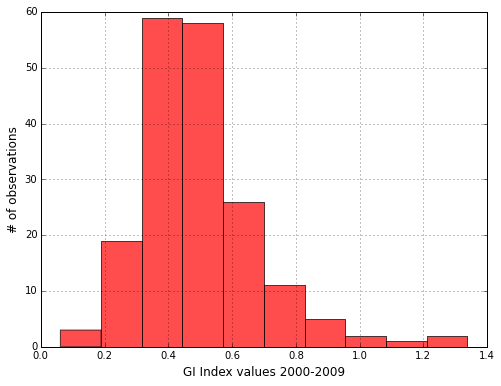

In [99]:
plt.figure(figsize=(8,6))
ax = Totala['Genindx2009'].hist(color='red', alpha=0.7, bins=10)
ax.set_xlabel("GI Index values 2000-2009", fontsize = 12)
ax.set_ylabel("# of observations", fontsize = 12)


In [100]:
writer = pd.ExcelWriter('Gentrification Index.xlsx', engine='xlsxwriter')
Totalb.to_excel(writer, sheet_name='Gentrification index', header=True, index=True, startrow=0, startcol=0)

In [101]:
writer.save()

In [102]:
Totalb.sort(['Genindx2009'], ascending=False).head(21)

,Dif2000-2009Bch,Dif2009-2013Bch,Dif2000-2009R,Dif2009-2013R,Dif2000-2009HV,Dif2009-2013HV,Dif2000-2009HI,Dif2009-2013HI,Dif2000-2009Pr,Dif2009-2013Pr,Dif2000-2009Pv,Dif2009-2013Pv,Genindx2009,Genindx2013
Claremont-Bathgate,0.425699,1.286941,0.300000,0.104396,5.647655,-0.259867,0.380841,0.027710,1.322995,-0.286344,0.050105,1.496856,1.337848,-0.104003
Bedford,1.216309,0.339604,0.747834,0.113535,2.023692,0.007346,0.249315,0.516779,3.251678,0.137964,0.095561,0.108736,1.232211,0.167749
South Jamaica,0.559205,0.916775,0.454297,0.207317,1.407945,0.032993,0.470827,-0.037541,3.796999,-0.231647,-0.263263,2.419681,1.158756,-0.255297
Central Harlem South,0.803269,0.389543,0.841649,0.273263,1.375636,0.068575,0.673923,0.239628,2.433256,0.116858,-0.130375,0.213226,1.043018,0.145774
Marble Hill-Inwood,0.535373,0.306732,0.525890,0.124072,3.755435,-0.016000,0.449375,-0.040862,0.200444,0.006928,-0.266319,0.239624,0.955473,0.023541
Bushwick South,1.620210,0.519642,0.668896,0.154309,1.912821,-0.051643,0.444326,0.255034,0.973455,0.344850,-0.052829,-0.092468,0.945423,0.219110
Crown Heights North,0.966945,0.415577,0.584459,0.109275,1.822340,0.089521,0.272595,0.193961,1.786685,0.056820,-0.097043,0.153792,0.921678,0.118560
Stuyvesant Heights,0.998200,0.120515,0.539629,0.190581,1.875445,0.010078,0.593423,-0.113351,1.252818,0.557180,-0.163633,0.027733,0.903858,0.122878
Co-op City,0.091367,0.182420,0.293740,0.136476,4.792857,-0.023428,0.160601,-0.083351,-0.134151,-0.088195,0.066304,0.244827,0.856352,-0.020151
Greenpoint,1.235224,0.320839,0.758077,0.255556,2.071671,0.036380,0.535415,0.226005,0.097737,-0.080038,-0.302723,0.076451,0.833474,0.113715


In [103]:
Totalb.sort(['Genindx2013'], ascending=False).head(21)

,Dif2000-2009Bch,Dif2009-2013Bch,Dif2000-2009R,Dif2009-2013R,Dif2000-2009HV,Dif2009-2013HV,Dif2000-2009HI,Dif2009-2013HI,Dif2000-2009Pr,Dif2009-2013Pr,Dif2000-2009Pv,Dif2009-2013Pv,Genindx2009,Genindx2013
SoHo-TriBeCa-Civic Center-Little Italy,0.346950,0.277158,-0.739726,2.980861,0.692347,-0.119538,0.429492,0.374802,0.385545,-0.040920,-0.100027,-0.158291,0.202439,0.605109
Battery Park City-Lower Manhattan,0.764415,1.557064,-0.876379,2.580913,2.231280,0.402728,0.380075,0.099026,2.429166,0.010257,0.254068,1.148570,0.779081,0.583570
Queensbridge-Ravenswood-Long Island City,0.604013,0.722515,2.930796,0.102993,0.480513,0.809952,0.129227,1.150608,0.619392,0.279802,-0.125163,0.004743,0.814851,0.510188
Springfield Gardens North,-0.100809,0.950018,1.136602,-0.051639,0.032110,1.834074,0.072840,0.374811,0.583056,-0.044771,0.100128,0.705465,0.270612,0.392838
East Harlem South,0.746602,0.528228,0.204409,0.623960,1.906433,0.642426,0.138156,0.151432,0.270158,0.164201,-0.094417,0.069679,0.560029,0.340095
Hunts Point,0.470297,1.836364,1.128329,0.080774,1.294378,-0.043227,0.260261,0.229232,1.005375,-0.082363,0.083762,0.567362,0.679146,0.242236
Hamilton Heights,1.441146,0.353084,0.573402,0.075741,-0.137346,0.602862,0.348144,0.266654,0.725452,0.187560,-0.085278,0.058771,0.506013,0.237855
North Side-South Side,1.878241,0.179607,0.661211,-0.062069,1.321493,0.298083,0.424388,0.613509,0.485689,0.298062,-0.049090,-0.084302,0.803352,0.235249
Central Harlem North-Polo Grounds,0.910684,0.215129,0.615542,0.055696,0.342539,0.647714,0.745357,0.077365,1.836890,0.353190,-0.067970,-0.033257,0.753164,0.230392
Bushwick South,1.620210,0.519642,0.668896,0.154309,1.912821,-0.051643,0.444326,0.255034,0.973455,0.344850,-0.052829,-0.092468,0.945423,0.219110


In [104]:
data = gpd.read_file('neighborhood_nta_census.geojson')

In [105]:
psGeom = ps.open('neighborhood_nta_census/neighborhood_nta_census.shp', 'r')

In [106]:
W = ps.buildContiguity(psGeom, criterion='rook', ids=data['ntaname'].values.tolist())

In [107]:
m = list(Totalb.sort(['Genindx2009'], ascending=False).head(21).index.values) 

In [108]:
m

[u'Claremont-Bathgate',
 u'Bedford',
 u'South Jamaica',
 u'Central Harlem South',
 u'Marble Hill-Inwood',
 u'Bushwick South',
 u'Crown Heights North',
 u'Stuyvesant Heights',
 u'Co-op City',
 u'Greenpoint',
 u'Queensbridge-Ravenswood-Long Island City',
 u'North Side-South Side',
 u'Bushwick North',
 u'Clinton Hill',
 u'Battery Park City-Lower Manhattan',
 u'East Harlem North',
 u'Parkchester',
 u'Central Harlem North-Polo Grounds',
 u'Chinatown',
 u'Baisley Park',
 u'East Elmhurst']

In [110]:
blist = [x.encode('UTF8') for x in m]

In [111]:
blist

['Claremont-Bathgate',
 'Bedford',
 'South Jamaica',
 'Central Harlem South',
 'Marble Hill-Inwood',
 'Bushwick South',
 'Crown Heights North',
 'Stuyvesant Heights',
 'Co-op City',
 'Greenpoint',
 'Queensbridge-Ravenswood-Long Island City',
 'North Side-South Side',
 'Bushwick North',
 'Clinton Hill',
 'Battery Park City-Lower Manhattan',
 'East Harlem North',
 'Parkchester',
 'Central Harlem North-Polo Grounds',
 'Chinatown',
 'Baisley Park',
 'East Elmhurst']

In [112]:
a = []
for i in blist:
    b = W[i].keys()
    a.append(b)

In [113]:
a

[[u'Fordham South',
  u'Belmont',
  u'Mount Hope',
  u'East Concourse-Concourse Village',
  u'East Tremont',
  u'Morrisania-Melrose'],
 [u'East Williamsburg',
  u'Crown Heights North',
  u'Williamsburg',
  u'Bushwick South',
  u'Clinton Hill',
  u'Stuyvesant Heights'],
 [u'Baisley Park', u'South Ozone Park', u'St. Albans', u'Jamaica'],
 [u'East Harlem North',
  u'East Harlem South',
  u'Central Harlem North-Polo Grounds',
  u'Morningside Heights'],
 [u'Spuyten Duyvil-Kingsbridge',
  u'Washington Heights North',
  u'Kingsbridge Heights'],
 [u'Bedford',
  u'East Williamsburg',
  u'Stuyvesant Heights',
  u'Ocean Hill',
  u'Bushwick North',
  u'Cypress Hills-City Line'],
 [u'Bedford',
  u'Crown Heights South',
  u'Prospect Heights',
  u'Clinton Hill',
  u'Ocean Hill',
  u'Stuyvesant Heights',
  u'Rugby-Remsen Village',
  u'Brownsville'],
 [u'Bedford', u'Bushwick South', u'Ocean Hill', u'Crown Heights North'],
 [u'Eastchester-Edenwald-Baychester'],
 [u'North Side-South Side', u'East William

In [127]:
c=[]
for i in a:
    d = (Totalb['Genindx2013'].loc[i])    
    c.append(d)

In [128]:
for i in range (0,len(c)):
    print(c[i].mean())

0.0370981721149
0.131483980724
-0.00519416257001
0.137365200574
0.0319110213724
0.133797759859
0.105271542971
0.140691593402
-0.0628370298608
0.139929094282
0.0448805218662
0.0582324980079
0.161358146048
0.0646070549318
0.210279419113
0.238753416915
-0.045670568535
0.147102445369
0.317342588736
0.0283450743315
0.0500737913559


In [ ]:
a

In [131]:
Totala['Genindx2013'].describe()

count    187.000000
mean       0.034788
std        0.264817
min       -0.509170
25%       -0.054065
50%        0.017728
75%        0.085002
max        3.109356
Name: Genindx2013, dtype: float64

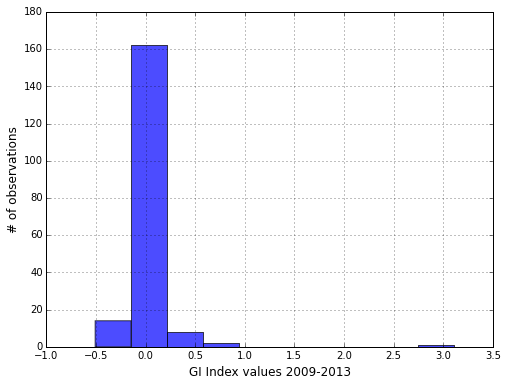

In [132]:
plt.figure(figsize=(8,6))
ax = Totala['Genindx2013'].hist(color='blue', alpha=0.7, bins=10)
ax.set_xlabel("GI Index values 2009-2013", fontsize = 12)
ax.set_ylabel("# of observations", fontsize = 12)

In [141]:
a = Totala['Genindx2013'].sort()

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

Airport                                                          NaN
Allerton-Pelham Gardens                                    -0.333897
Annadale-Huguenot-Prince's Bay-Eltingville                 -0.509170
Arden Heights                                               0.048192
Astoria                                                     0.025145
Auburndale                                                 -0.123163
Baisley Park                                                0.033732
Bath Beach                                                  0.127035
Battery Park City-Lower Manhattan                           0.583570
Bay Ridge                                                   0.007205
Bayside-Bayside Hills                                       0.087443
Bedford                                                     0.167749
Bedford Park-Fordham North                                 -0.220437
Bellerose                                                  -0.270409
Belmont                           

In [172]:
#adir={}
#for i in blist:
    #adir[i]=W[i].keys()